In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#sample data
X= np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1,1)
y= np.array([1,4,9,16,25,36,49,64,81,100])

In [3]:
#transform to polynomial features (degree2)
poly= PolynomialFeatures(degree=2)
X_poly=poly.fit_transform(X)

In [4]:
#fit model
model = LinearRegression()
model.fit(X_poly,y)

LinearRegression()

In [5]:
#predictions
y_pred=model.predict(X_poly)
y_pred

array([  1.,   4.,   9.,  16.,  25.,  36.,  49.,  64.,  81., 100.])

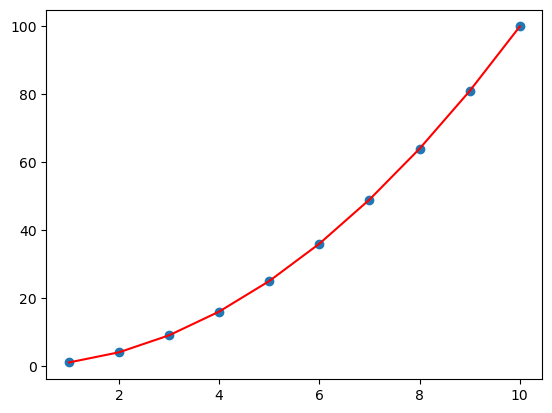

In [6]:
plt.scatter(X,y)
plt.plot(X,y_pred,color="red")
plt.show()

In [7]:
#_______________________________________________________________________________________________________________________

In [8]:
#1. load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
cols=["mpg","cylinders","displacement","horsepower","weight","acceleration","model_year","origin","car_name"]

df=pd.read_csv(url,sep="\\s+", names=cols, na_values="?")

In [9]:
#2. preprocessing
df = df.dropna(subset=["horsepower","mpg"])
x=df[["horsepower"]].astype(float).values
y=df["mpg"].values

In [10]:
#3. train-test-split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
#4. linear regression(degress 1)
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)
y_pred_linear = linear_model.predict(x_test)

In [12]:
#rmse using numpy
rmse_linear = np.sqrt(mean_squared_error(y_test,y_pred_linear))
r2_linear = r2_score(y_test,y_pred_linear)

print("linear regression (degree 1)")
print("test rmse : ", rmse_linear)
print("test r2 : ", r2_linear)

linear regression (degree 1)
test rmse :  4.706722545876633
test r2 :  0.5659681822256184


In [13]:
#5. polynomial regression (degree 3, ridge)
degree= 3
poly= PolynomialFeatures(degree=degree, include_bias=False)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.fit_transform(x_test)

poly_model = Ridge(alpha=1.0)
poly_model.fit(x_train_poly,y_train)
y_pred_poly= poly_model.predict(x_test_poly)

rmse_poly = np.sqrt(mean_squared_error(y_test,y_pred_poly))
r2_poly=r2_score(y_test,y_pred_poly)

print("Polynomial Regression (degree : ",degree,")")
print("total rmse : ", rmse_poly)
print("test r2 : ", r2_poly)

Polynomial Regression (degree :  3 )
total rmse :  4.296449880587125
test r2 :  0.6383371739768975


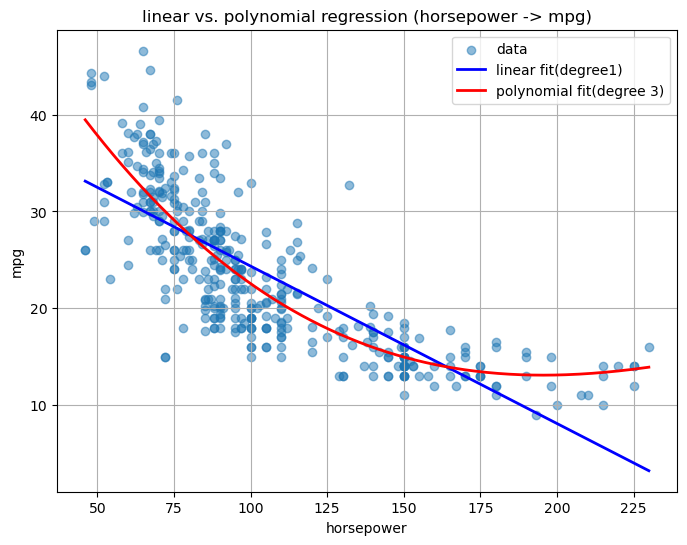

In [14]:
#6. plot comparision
x_range=np.linspace(x.min(),x.max(),300).reshape(-1,1)
y_range_linear=linear_model.predict(x_range)
y_range_poly=poly_model.predict(poly.transform(x_range))

plt.figure(figsize=(8,6))
plt.scatter(x,y,alpha=0.5, label="data")
plt.plot(x_range,y_range_linear,color="blue",linewidth=2,label="linear fit(degree1)")
plt.plot(x_range,y_range_poly,color="red",linewidth=2,label="polynomial fit(degree 3)")
plt.xlabel("horsepower")
plt.ylabel("mpg")
plt.title("linear vs. polynomial regression (horsepower -> mpg)")
plt.legend()
plt.grid(True)
plt.show()

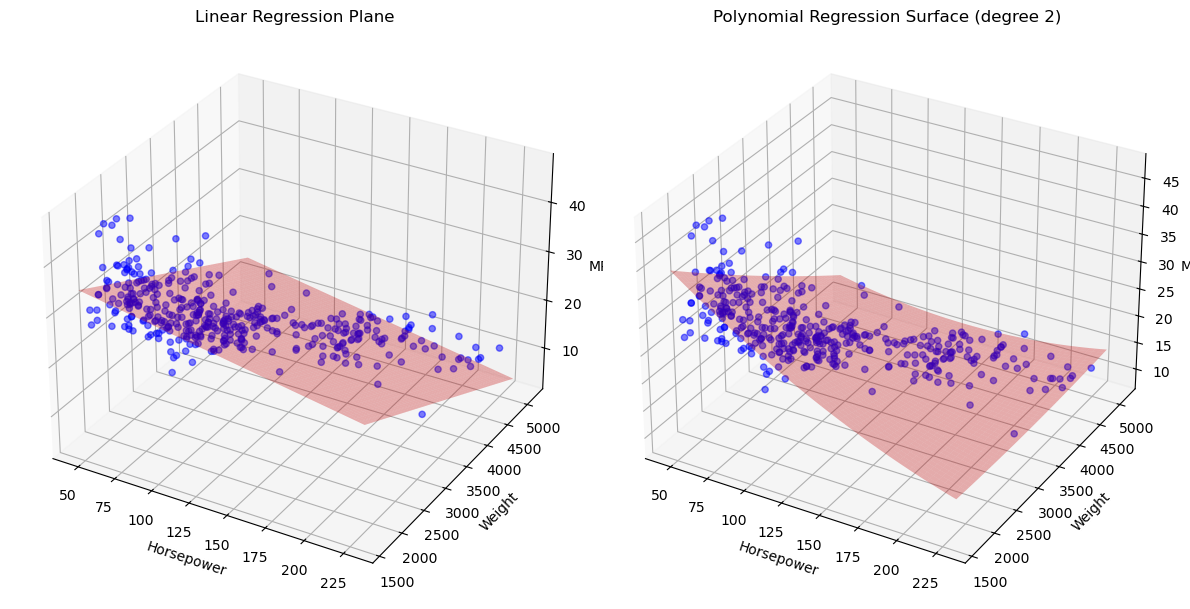

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# -----------------------------
# 1) Load dataset
# -----------------------------
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
cols = ["mpg","cylinders","displacement","horsepower","weight","acceleration","model_year","origin","car_name"]
df = pd.read_csv(url, sep=r'\s+', names=cols, na_values='?')

# -----------------------------
# 2) Preprocess: select two features for plotting
# -----------------------------
df = df.dropna(subset=["horsepower","mpg","weight"])
X = df[["horsepower","weight"]].astype(float).values
y = df["mpg"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------
# 3) Linear regression
# -----------------------------
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# -----------------------------
# 4) Polynomial regression (degree 2)
# -----------------------------
degree = 2
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = Ridge(alpha=1.0)
poly_model.fit(X_train_poly, y_train)

# -----------------------------
# 5) Prepare grid for surface plot
# -----------------------------

# Create 50 evenly spaced values from min to max horsepower
hp_range = np.linspace(X[:,0].min(), X[:,0].max(), 50)

# Create 50 evenly spaced values from min to max weight
weight_range = np.linspace(X[:,1].min(), X[:,1].max(), 50)

# Create a 2D grid of all combinations of horsepower and weight
hp_grid, weight_grid = np.meshgrid(hp_range, weight_range)

# Flatten the grids and combine them into a 2500x2 array of all (horsepower, weight) points
X_grid = np.c_[hp_grid.ravel(), weight_grid.ravel()]

# -----------------------------
# Predictions for surfaces
# -----------------------------

# Predict mpg for all points in the grid using linear regression
# Then reshape to 50x50 grid to match hp_grid and weight_grid for plotting
y_linear_grid = linear_model.predict(X_grid).reshape(hp_grid.shape)

# Predict mpg for all points using polynomial regression
# poly.transform adds polynomial and interaction terms before prediction
# Reshape to 50x50 grid for plotting
y_poly_grid = poly_model.predict(poly.transform(X_grid)).reshape(hp_grid.shape)

# -----------------------------
# 6) 3D Plot
# -----------------------------

# Create a figure of size 12x6 inches
fig = plt.figure(figsize=(12,6))

# -----------------------------
# Linear Regression surface
# -----------------------------
# Add a 3D subplot in the first position (1 row, 2 columns, 1st plot)
ax1 = fig.add_subplot(1,2,1, projection='3d')

# Plot actual data points (horsepower, weight, mpg) as blue scatter
ax1.scatter(X[:,0], X[:,1], y, color='blue', alpha=0.5)

# Plot the linear regression plane as a red semi-transparent surface
ax1.plot_surface(hp_grid, weight_grid, y_linear_grid, color='red', alpha=0.3)

# Set axis labels and title for clarity
ax1.set_xlabel('Horsepower')
ax1.set_ylabel('Weight')
ax1.set_zlabel('MPG')
ax1.set_title('Linear Regression Plane')

# -----------------------------
# Polynomial Regression surface
# -----------------------------
# Add a 3D subplot in the second position (1 row, 2 columns, 2nd plot)
ax2 = fig.add_subplot(1,2,2, projection='3d')

# Plot actual data points again for reference
ax2.scatter(X[:,0], X[:,1], y, color='blue', alpha=0.5)

# Plot the polynomial regression surface (curved) as red semi-transparent surface
ax2.plot_surface(hp_grid, weight_grid, y_poly_grid, color='red', alpha=0.3)

# Set axis labels and title (including the polynomial degree dynamically)
ax2.set_xlabel('Horsepower')
ax2.set_ylabel('Weight')
ax2.set_zlabel('MPG')
ax2.set_title(f'Polynomial Regression Surface (degree {degree})')


plt.tight_layout()
plt.show()